Exploring Gensim Doc2Vec<br>
https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5

In [1]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
%matplotlib inline

In [2]:
from spacy.vectors import Vectors
from spacy.strings import StringStore
from scipy.cluster.hierarchy import dendrogram, linkage
from wordcloud import WordCloud
from nltk.corpus import stopwords

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [3]:
df = pd.read_csv('../ProteomeXchange/scraped_pubmed_latest.csv')
df = df[df.Abstract.notnull()]
df.reset_index(inplace=True)
#df.head(2)

In [4]:
nlp = spacy.load('en_core_web_lg')

## Follow the tutorial and use one abstract as a corpus, consider each sentence as a doc.

In [5]:
abstract = df.iloc[0]['Abstract']
doc = nlp(abstract)
data = [sent.text for sent in doc.sents]

In [6]:
data

['This review presents how R, the popular statistical environment and programming language, can be used in the frame of proteomics data analysis.',
 'A short introduction to R is given, with special emphasis on some of the features that make R and its add-on packages premium software for sound and reproducible data analysis.',
 'The reader is also advised on how to find relevant R software for proteomics.',
 'Several use cases are then presented, illustrating data input/output, quality control, quantitative proteomics and data analysis.',
 'Detailed code and additional links to extensive documentation are available in the freely available companion package RforProteomics.',
 'This article is part of a Special Issue entitled: Computational Proteomics in the Post-Identification Era.',
 'Guest Editors: Martin Eisenacher and Christian Stephan.']

In [7]:
tagged_data = [TaggedDocument(
                            words=word_tokenize(d.lower()), 
                            tags=[str(i)]) for i, d in enumerate(data)]

In [8]:
tagged_data

[TaggedDocument(words=['this', 'review', 'presents', 'how', 'r', ',', 'the', 'popular', 'statistical', 'environment', 'and', 'programming', 'language', ',', 'can', 'be', 'used', 'in', 'the', 'frame', 'of', 'proteomics', 'data', 'analysis', '.'], tags=['0']),
 TaggedDocument(words=['a', 'short', 'introduction', 'to', 'r', 'is', 'given', ',', 'with', 'special', 'emphasis', 'on', 'some', 'of', 'the', 'features', 'that', 'make', 'r', 'and', 'its', 'add-on', 'packages', 'premium', 'software', 'for', 'sound', 'and', 'reproducible', 'data', 'analysis', '.'], tags=['1']),
 TaggedDocument(words=['the', 'reader', 'is', 'also', 'advised', 'on', 'how', 'to', 'find', 'relevant', 'r', 'software', 'for', 'proteomics', '.'], tags=['2']),
 TaggedDocument(words=['several', 'use', 'cases', 'are', 'then', 'presented', ',', 'illustrating', 'data', 'input/output', ',', 'quality', 'control', ',', 'quantitative', 'proteomics', 'and', 'data', 'analysis', '.'], tags=['3']),
 TaggedDocument(words=['detailed', 'c

In [9]:
tagged_data[0]

TaggedDocument(words=['this', 'review', 'presents', 'how', 'r', ',', 'the', 'popular', 'statistical', 'environment', 'and', 'programming', 'language', ',', 'can', 'be', 'used', 'in', 'the', 'frame', 'of', 'proteomics', 'data', 'analysis', '.'], tags=['0'])

So it apears that TaggedDocument() allows tagging of each document to prepare for Doc2Vec

In [10]:
%%time
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(
    vector_size=vec_size,
    alpha=alpha,
    min_alpha=0.025,
    min_count=1,
    dm=1
)

model.build_vocab(tagged_data)

CPU times: user 4.66 ms, sys: 12.5 ms, total: 17.2 ms
Wall time: 2.47 ms


In [11]:
%%time
for epoch in range(max_epochs):
    print('Iteraction {0}'.format(epoch))
    model.train(
        tagged_data,
        total_examples=model.corpus_count,
        epochs=model.epochs
    )
    
    # decrease the learning rate
    model.alpha -= 0.0002
    
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save('./d2v_test1.model')
print("Model Saved")

Iteraction 0
Iteraction 1
Iteraction 2
Iteraction 3
Iteraction 4
Iteraction 5
Iteraction 6
Iteraction 7
Iteraction 8
Iteraction 9
Iteraction 10
Iteraction 11
Iteraction 12
Iteraction 13
Iteraction 14
Iteraction 15
Iteraction 16
Iteraction 17
Iteraction 18
Iteraction 19
Iteraction 20
Iteraction 21
Iteraction 22
Iteraction 23
Iteraction 24
Iteraction 25
Iteraction 26
Iteraction 27
Iteraction 28
Iteraction 29
Iteraction 30
Iteraction 31
Iteraction 32
Iteraction 33
Iteraction 34
Iteraction 35
Iteraction 36
Iteraction 37
Iteraction 38
Iteraction 39
Iteraction 40
Iteraction 41
Iteraction 42
Iteraction 43
Iteraction 44
Iteraction 45
Iteraction 46
Iteraction 47
Iteraction 48
Iteraction 49
Iteraction 50
Iteraction 51
Iteraction 52
Iteraction 53
Iteraction 54
Iteraction 55
Iteraction 56
Iteraction 57
Iteraction 58
Iteraction 59
Iteraction 60
Iteraction 61
Iteraction 62
Iteraction 63
Iteraction 64
Iteraction 65
Iteraction 66
Iteraction 67
Iteraction 68
Iteraction 69
Iteraction 70
Iteraction 71
It

##### Test the model

In [12]:
model = Doc2Vec.load('d2v_test1.model')

In [13]:
# print the vector for tag0
print(model.docvecs['0'])

[ 0.1861542   0.09071907  0.02264698  1.5229619   1.5332084  -1.4950289
 -0.580156   -1.4625528  -1.0072331  -3.8327425   0.6833805   2.3254569
 -0.33665752  2.6836138  -0.1344311   0.12250717  1.5328014  -2.33498
  0.64459926  0.0739395 ]


In [14]:
similar_doc = model.docvecs.most_similar('0')
print(similar_doc)

[('2', 0.52772057056427), ('6', 0.3066648244857788), ('3', 0.29190951585769653), ('4', 0.24837565422058105), ('5', 0.24558907747268677), ('1', 0.134752094745636)]


In [15]:
inds = [sim[0] for sim in similar_doc]

In [16]:
print('-'*5, 'Tag=0', '-'*10)
print(data[0])
for i in inds:
    print('-'*5, 'Tag=%s' % i, '-'*10)
    print(data[int(i)])

----- Tag=0 ----------
This review presents how R, the popular statistical environment and programming language, can be used in the frame of proteomics data analysis.
----- Tag=2 ----------
The reader is also advised on how to find relevant R software for proteomics.
----- Tag=6 ----------
Guest Editors: Martin Eisenacher and Christian Stephan.
----- Tag=3 ----------
Several use cases are then presented, illustrating data input/output, quality control, quantitative proteomics and data analysis.
----- Tag=4 ----------
Detailed code and additional links to extensive documentation are available in the freely available companion package RforProteomics.
----- Tag=5 ----------
This article is part of a Special Issue entitled: Computational Proteomics in the Post-Identification Era.
----- Tag=1 ----------
A short introduction to R is given, with special emphasis on some of the features that make R and its add-on packages premium software for sound and reproducible data analysis.


##### Apply the model on unseen data

In [17]:
abstract2 = df.iloc[1]['Abstract']
doc2 = nlp(abstract2)
data2 = [sent.text for sent in doc.sents]

In [18]:
data2

['This review presents how R, the popular statistical environment and programming language, can be used in the frame of proteomics data analysis.',
 'A short introduction to R is given, with special emphasis on some of the features that make R and its add-on packages premium software for sound and reproducible data analysis.',
 'The reader is also advised on how to find relevant R software for proteomics.',
 'Several use cases are then presented, illustrating data input/output, quality control, quantitative proteomics and data analysis.',
 'Detailed code and additional links to extensive documentation are available in the freely available companion package RforProteomics.',
 'This article is part of a Special Issue entitled: Computational Proteomics in the Post-Identification Era.',
 'Guest Editors: Martin Eisenacher and Christian Stephan.']

In [19]:
test_data = word_tokenize(data2[0].lower())
test_data

['this',
 'review',
 'presents',
 'how',
 'r',
 ',',
 'the',
 'popular',
 'statistical',
 'environment',
 'and',
 'programming',
 'language',
 ',',
 'can',
 'be',
 'used',
 'in',
 'the',
 'frame',
 'of',
 'proteomics',
 'data',
 'analysis',
 '.']

In [20]:
# Infer a vector for data unused for training
v1 = model.infer_vector(test_data)
print("V1_infer = ", v1)

V1_infer =  [ 0.01845027 -0.03322623  0.02726855  0.12719111  0.10130765 -0.06072902
 -0.05569919 -0.07748824 -0.11211476 -0.26118127  0.03669867  0.18374564
 -0.03462239  0.25628167 -0.05348578 -0.04463302  0.11983297 -0.22750562
  0.11379435  0.04095594]


## Now try on a few abstracts and see how much time it takes

In [21]:
def process_abstract(abstract):
    doc = nlp(abstract)
    tokenized_doc = [token.text.lower() for token in doc]# if not token.is_stop]
    return tokenized_doc

##### *In the above, I commented out is_stop checking part, but even with stopwords removed, the result didi not change.

In [22]:
%%time
n = len(df)
abstracts = df.iloc[:n]['Abstract']
data2 = []
for i in range(n):
    abst = abstracts[i]
    tokenized_doc = process_abstract(abst)
    data2.append(tokenized_doc)

CPU times: user 15min 39s, sys: 15min 26s, total: 31min 6s
Wall time: 4min


In [34]:
tagged_data2 = [TaggedDocument(
                            words=d, 
                            tags=[str(i)]) for i, d in enumerate(data2)]

In [35]:
%%time
# Train the model
max_epochs = 500
vec_size = 300
alpha = 0.01

model = Doc2Vec(
    vector_size=vec_size,
    alpha=alpha,
    min_alpha=0.01,
    min_count=1,
    dm=1,
    window=15,
    sample=0, #1e-5,
    negative=20, #5,
    workers=4
)

model.build_vocab(tagged_data2)

for epoch in range(max_epochs):
    if epoch % 100 == 0:
        print('Iteraction {0}'.format(epoch))
    model.train(
        tagged_data,
        total_examples=model.corpus_count,
        epochs=model.epochs
    )
    
    # decrease the learning rate
    model.alpha -= 0.0002
    
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save('./d2v_test2.model')
print("Model Saved")

Iteraction 0
Iteraction 100
Iteraction 200
Iteraction 300
Iteraction 400
Model Saved
CPU times: user 6.5 s, sys: 1.05 s, total: 7.55 s
Wall time: 6.71 s


In [36]:
model2 = Doc2Vec.load('d2v_test2.model')

In [37]:
m = 62

similar_doc = model2.docvecs.most_similar(str(m))
print(similar_doc)

inds = [sim[0] for sim in similar_doc]

print('-'*5, 'Tag=%d' % m, '-'*10)
print(abstracts[m])
for i in inds[:5]:
    print('-'*5, 'Tag=%s' % i, '-'*10)
    print(abstracts[int(i)])

[('4309', 0.18812178075313568), ('2837', 0.18068931996822357), ('4276', 0.17545822262763977), ('1929', 0.1741359382867813), ('1154', 0.17260442674160004), ('1011', 0.17119327187538147), ('2741', 0.1697559803724289), ('4300', 0.16797667741775513), ('3051', 0.16792616248130798), ('2483', 0.16346746683120728)]
----- Tag=62 ----------
The final goal of the Russian part of the Chromosome-centric Human Proteome Project (C-HPP) was established as the analysis of the chromosome 18 (Chr 18) protein complement in plasma, liver tissue and HepG2 cells with the sensitivity of 10(-18) M. Using SRM, we have recently targeted 277 Chr 18 proteins in plasma, liver, and HepG2 cells. On the basis of the results of the survey, the SRM assays were drafted for 250 proteins: 41 proteins were found only in the liver tissue, 82 proteins were specifically detected in depleted plasma, and 127 proteins were mapped in both samples. The targeted analysis of HepG2 cells was carried out for 49 proteins; 41 of them wer

In [38]:
# Check identical abstracts
ident_inds = df[df.Abstract.str.contains('Russian')].index
for ind in ident_inds:
    v = model.infer_vector(data2[ind])
    print('Index %d' % ind, '\n', v)

Index 56 
 [  2.2870274    2.5291104    1.0461124   -6.0138483   -3.4523609
   0.70063585  -0.4129791   -5.2370625   -4.124382     0.8008206
   5.028372    -6.9862676   -3.4272606  -12.098175   -11.545633
  -1.9186647   -4.211979     1.2656188   -4.450032    -6.9477425
   5.8801627    4.6242685    4.4589534    2.307615     7.296915
 -12.786616   -12.961272     4.5342693   -1.3396058   -9.315122
   1.2494183    9.2728195   -0.6734332    2.4587426    0.11264924
   6.470248     2.8730087   -8.252694    -6.09195     -1.0474111
   1.2330114    6.9849277    2.4652772    4.314021    -4.610396
  -5.3443637   -2.44492      3.7225811   -8.290646    -4.8685107
   2.8505147    8.519623     3.283494     0.89417255  -3.8713014
   9.842962    -1.6413282   -0.20249857  -5.0948424  -17.924566
   6.5242896    2.095952   -11.329366   -10.870233     4.8085346
  -2.3726792    2.6198838   -1.584767   -10.535037    -4.7156005
  -4.7939315   -2.516308    -4.440775    14.777577     8.398649
   5.009006     3.2

In [39]:
ident_inds

Int64Index([56, 62, 63, 64, 68, 116, 439, 837, 1656], dtype='int64')

In [40]:
# a set of abstracts, some of which are identical
for ind in ident_inds:
    print('Index %d:' % ind, '\n', abstracts[ind])

Index 56: 
 The final goal of the Russian part of the Chromosome-centric Human Proteome Project (C-HPP) was established as the analysis of the chromosome 18 (Chr 18) protein complement in plasma, liver tissue and HepG2 cells with the sensitivity of 10(-18) M. Using SRM, we have recently targeted 277 Chr 18 proteins in plasma, liver, and HepG2 cells. On the basis of the results of the survey, the SRM assays were drafted for 250 proteins: 41 proteins were found only in the liver tissue, 82 proteins were specifically detected in depleted plasma, and 127 proteins were mapped in both samples. The targeted analysis of HepG2 cells was carried out for 49 proteins; 41 of them were successfully registered using ordinary SRM and 5 additional proteins were registered using a combination of irreversible binding of proteins on CN-Br Sepharose 4B with SRM. Transcriptome profiling of HepG2 cells performed by RNAseq and RT-PCR has shown a significant correlation (r = 0.78) for 42 gene transcripts. A pi

##### PCA and check if those ones are close in space<br>
56, 62, 63, 64, 68 should be close and 116, 439, 837 should be close with each other

In [63]:
from sklearn.decomposition import PCA

In [64]:
doc_vecs = model2.docvecs.vectors_docs
print(doc_vecs.shape)

(4334, 300)


In [65]:
pca = PCA(n_components=4)
vecs_pca = pca.fit_transform(doc_vecs)
print(vecs_pca.shape)

(4334, 4)


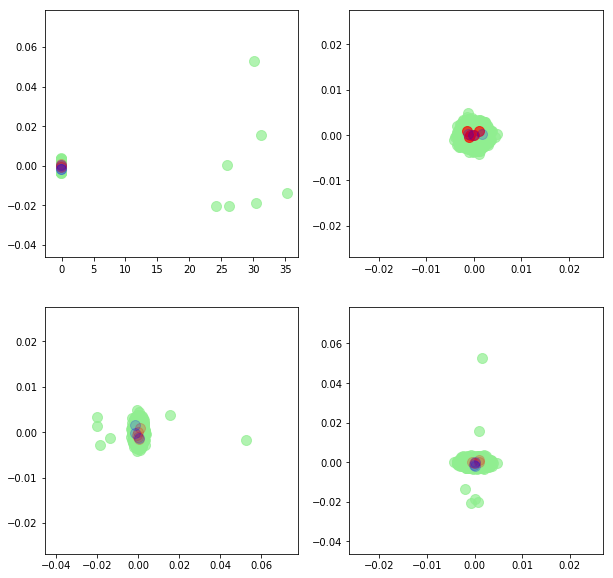

In [66]:
s=100
alpha=0.7
alpha2 = 0.2
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].scatter(vecs_pca[:, 0], vecs_pca[:, 1], s=s, alpha=alpha,  color='lightgreen')
axes[1, 0].scatter(vecs_pca[:, 1], vecs_pca[:, 2], s=s, alpha=alpha,  color='lightgreen')
axes[0, 1].scatter(vecs_pca[:, 2], vecs_pca[:, 3], s=s, alpha=alpha,  color='lightgreen')
axes[1, 1].scatter(vecs_pca[:, 3], vecs_pca[:, 1], s=s, alpha=alpha,  color='lightgreen')

axes[0, 0].scatter(vecs_pca[[56, 62, 63, 64, 68], 0], vecs_pca[[56, 62, 63, 64, 68], 1], 
                                s=s, alpha=alpha2,  color='red')
axes[1, 0].scatter(vecs_pca[[56, 62, 63, 64, 68], 1], vecs_pca[[56, 62, 63, 64, 68], 2], 
                               s=s, alpha=alpha2,  color='red')
axes[0, 1].scatter(vecs_pca[[56, 62, 63, 64, 68], 2], vecs_pca[[56, 62, 63, 64, 68], 3], 
                               s=s, alpha=alpha,  color='red')
axes[1, 1].scatter(vecs_pca[[56, 62, 63, 64, 68], 3], vecs_pca[[56, 62, 63, 64, 68], 1], 
                               s=s, alpha=alpha2,  color='red')

axes[0, 0].scatter(vecs_pca[[116, 439, 837], 0], vecs_pca[[116, 439, 837], 1], 
                                s=s, alpha=alpha2,  color='blue')
axes[1, 0].scatter(vecs_pca[[116, 439, 837], 1], vecs_pca[[116, 439, 837], 2], 
                               s=s, alpha=alpha2,  color='blue')
axes[0, 1].scatter(vecs_pca[[116, 439, 837], 2], vecs_pca[[116, 439, 837], 3], 
                               s=s, alpha=alpha2,  color='blue')
axes[1, 1].scatter(vecs_pca[[116, 439, 837], 3], vecs_pca[[116, 439, 837], 1], 
                               s=s, alpha=alpha2,  color='blue')

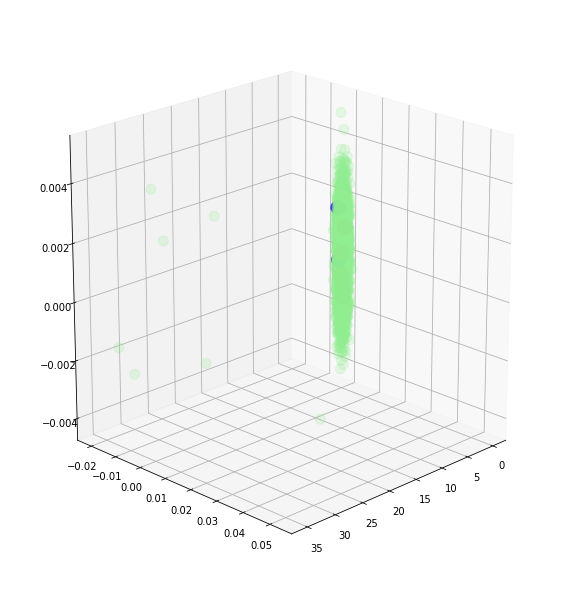

In [67]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure(1, figsize=(8, 8))
plt.clf()
ax = Axes3D(fig, elev=20, azim=45, rect=[0, 0, .95, 1])

ax.scatter(vecs_pca[:, 0], vecs_pca[:, 1], vecs_pca[:, 2], color='lightgreen', 
                           marker = 'o', s=100, cmap = cm.jet, alpha=0.2)
ax.scatter(vecs_pca[[56, 62, 63, 64, 68], 0], vecs_pca[[56, 62, 63, 64, 68], 1], vecs_pca[[56, 62, 63, 64, 68], 2], 
                        color='red', marker = 'o', s=200, cmap = cm.jet, alpha=0.7)
ax.scatter(vecs_pca[[116, 439, 837], 0], vecs_pca[[116, 439, 837], 1], vecs_pca[[116, 439, 837], 2], 
                       color='blue', marker = 'o', s=200, cmap = cm.jet, alpha=0.7)

#### 8 clusters??? Really??? Cluster and check

In [68]:
from sklearn.cluster import KMeans

In [69]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(vecs_pca)
labels = kmeans.labels_

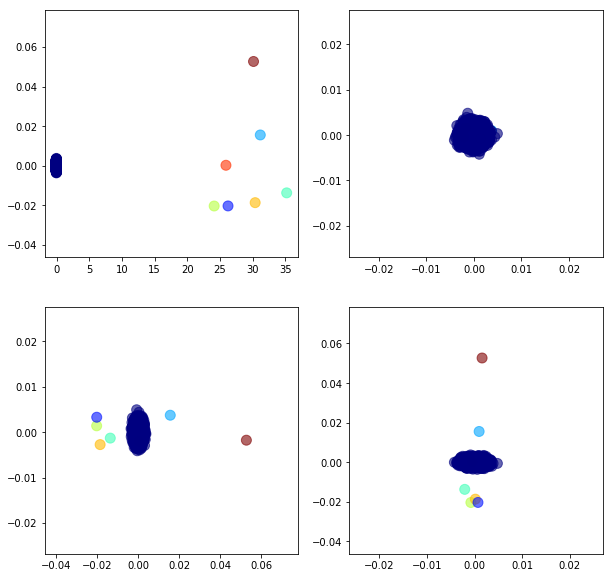

In [70]:
s=100
alpha=0.6
alpha2 = 0.2
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].scatter(vecs_pca[:, 0], vecs_pca[:, 1], c=labels, s=s, alpha=alpha, cmap = cm.jet)
axes[1, 0].scatter(vecs_pca[:, 1], vecs_pca[:, 2], c=labels, s=s, alpha=alpha, cmap = cm.jet)
axes[0, 1].scatter(vecs_pca[:, 2], vecs_pca[:, 3], c=labels, s=s, alpha=alpha, cmap = cm.jet)
axes[1, 1].scatter(vecs_pca[:, 3], vecs_pca[:, 1], c=labels, s=s, alpha=alpha, cmap = cm.jet)

# axes[0, 0].scatter(vecs_pca[[56, 62, 63, 64, 68], 0], vecs_pca[[56, 62, 63, 64, 68], 1], 
#                                 s=s, alpha=alpha2,  color='red')
# axes[1, 0].scatter(vecs_pca[[56, 62, 63, 64, 68], 1], vecs_pca[[56, 62, 63, 64, 68], 2], 
#                                s=s, alpha=alpha2,  color='red')
# axes[0, 1].scatter(vecs_pca[[56, 62, 63, 64, 68], 2], vecs_pca[[56, 62, 63, 64, 68], 3], 
#                                s=s, alpha=alpha,  color='red')
# axes[1, 1].scatter(vecs_pca[[56, 62, 63, 64, 68], 3], vecs_pca[[56, 62, 63, 64, 68], 1], 
#                                s=s, alpha=alpha2,  color='red')

# axes[0, 0].scatter(vecs_pca[[116, 439, 837], 0], vecs_pca[[116, 439, 837], 1], 
#                                 s=s, alpha=alpha2,  color='blue')
# axes[1, 0].scatter(vecs_pca[[116, 439, 837], 1], vecs_pca[[116, 439, 837], 2], 
#                                s=s, alpha=alpha2,  color='blue')
# axes[0, 1].scatter(vecs_pca[[116, 439, 837], 2], vecs_pca[[116, 439, 837], 3], 
#                                s=s, alpha=alpha2,  color='blue')
# axes[1, 1].scatter(vecs_pca[[116, 439, 837], 3], vecs_pca[[116, 439, 837], 1], 
#                                s=s, alpha=alpha2,  color='blue')

In [71]:
labels[[116, 439, 837]]

array([0, 0, 0], dtype=int32)

In [72]:
labels[[56, 62, 63, 64, 68]]

array([0, 0, 0, 0, 0], dtype=int32)

In [73]:
pd.Series(labels).value_counts()

0    4327
7       1
3       1
6       1
2       1
5       1
1       1
4       1
dtype: int64

In [74]:
for i in range(1, 8):
    label = i
    ind = np.where(labels == label)[0]
    print('Index %d' % ind)
    print(df.iloc[ind]['Abstract'].values)

Index 5
['The major fungal pathogen Candida albicans can occupy diverse microenvironments in its human host. During colonization of the gastrointestinal or urogenital tracts, mucosal surfaces, bloodstream, and internal organs, C. albicans thrives in niches that differ with respect to available nutrients and local environmental stresses. Although most studies are performed on glucose-grown cells, changes in carbon source dramatically affect cell wall architecture, stress responses, and drug resistance. We show that growth on the physiologically relevant carboxylic acid, lactate, has a significant impact on the C. albicans cell wall proteome and secretome. The regulation of cell wall structural proteins (e.g. Cht1, Phr1, Phr2, Pir1) correlated with extensive cell wall remodeling in lactate-grown cells and with their increased resistance to stresses and antifungal drugs, compared with glucose-grown cells. Moreover, changes in other proteins (e.g. Als2, Gca1, Phr1, Sap9) correlated with th

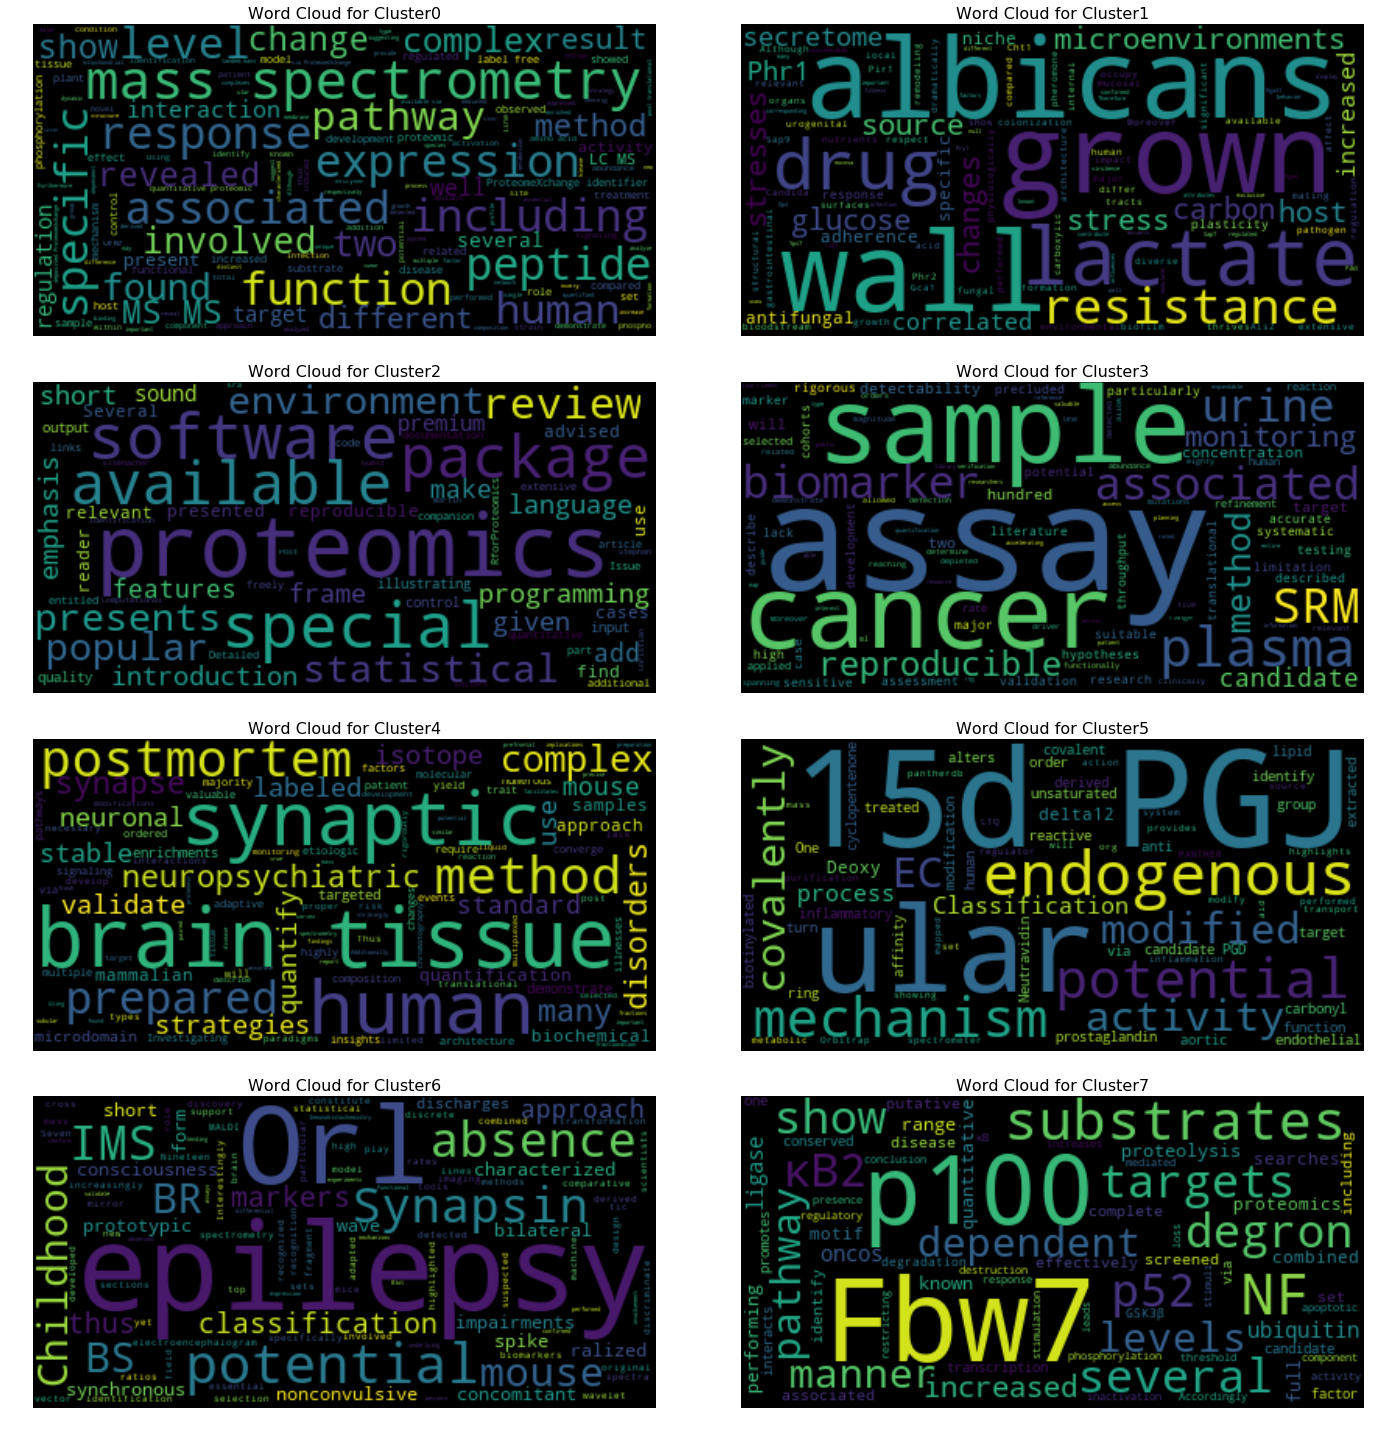

In [75]:
fig = plt.figure(figsize=(20, 20))
for i in range(8):
    clstr_inds = (np.argwhere(labels == i).flatten())
    clstr_text = ' '.join([abstracts[j] for j in clstr_inds])
    clstr_text = clstr_text.replace('protein', '')
    clstr_text = clstr_text.replace('analysis', '')
    clstr_text = clstr_text.replace('identified', '')
    clstr_text = clstr_text.replace('proteome', '')
    clstr_text = clstr_text.replace('data', '')
    clstr_text = clstr_text.replace('studies', '')
    clstr_text = clstr_text.replace('study', '')
    clstr_text = clstr_text.replace('cell', '')
    clstr_text = clstr_text.replace('using', '')
    clstr_text = clstr_text.replace('gene', '')
    clstr_text = clstr_text.replace('used', '')
    wc = WordCloud().generate(clstr_text)
    
    ax = fig.add_subplot(4, 2, i+1)
    ax.set_title('Word Cloud for Cluster%d' % i, fontsize=16)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')

fig.tight_layout()

##### Try again with normalized vectors

In [76]:
doc_vecs = model2.docvecs.vectors_docs_norm
print(doc_vecs.shape)

(4334, 300)


In [77]:
pca = PCA(n_components=4)
vecs_pca = pca.fit_transform(doc_vecs)
print(vecs_pca.shape)

(4334, 4)


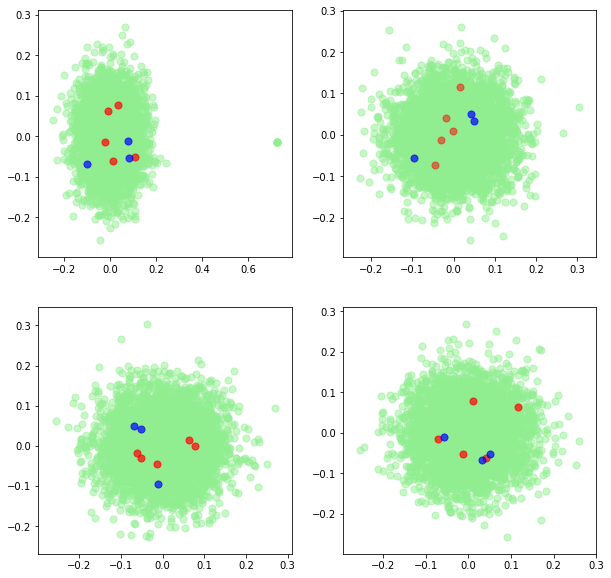

In [78]:
s=50
alpha=0.5
alpha2 = 0.7
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].scatter(vecs_pca[:, 0], vecs_pca[:, 1], s=s, alpha=alpha,  color='lightgreen')
axes[1, 0].scatter(vecs_pca[:, 1], vecs_pca[:, 2], s=s, alpha=alpha,  color='lightgreen')
axes[0, 1].scatter(vecs_pca[:, 2], vecs_pca[:, 3], s=s, alpha=alpha,  color='lightgreen')
axes[1, 1].scatter(vecs_pca[:, 3], vecs_pca[:, 1], s=s, alpha=alpha,  color='lightgreen')

axes[0, 0].scatter(vecs_pca[[56, 62, 63, 64, 68], 0], vecs_pca[[56, 62, 63, 64, 68], 1], 
                                s=s, alpha=alpha2,  color='red')
axes[1, 0].scatter(vecs_pca[[56, 62, 63, 64, 68], 1], vecs_pca[[56, 62, 63, 64, 68], 2], 
                               s=s, alpha=alpha2,  color='red')
axes[0, 1].scatter(vecs_pca[[56, 62, 63, 64, 68], 2], vecs_pca[[56, 62, 63, 64, 68], 3], 
                               s=s, alpha=alpha,  color='red')
axes[1, 1].scatter(vecs_pca[[56, 62, 63, 64, 68], 3], vecs_pca[[56, 62, 63, 64, 68], 1], 
                               s=s, alpha=alpha2,  color='red')

axes[0, 0].scatter(vecs_pca[[116, 439, 837], 0], vecs_pca[[116, 439, 837], 1], 
                                s=s, alpha=alpha2,  color='blue')
axes[1, 0].scatter(vecs_pca[[116, 439, 837], 1], vecs_pca[[116, 439, 837], 2], 
                               s=s, alpha=alpha2,  color='blue')
axes[0, 1].scatter(vecs_pca[[116, 439, 837], 2], vecs_pca[[116, 439, 837], 3], 
                               s=s, alpha=alpha2,  color='blue')
axes[1, 1].scatter(vecs_pca[[116, 439, 837], 3], vecs_pca[[116, 439, 837], 1], 
                               s=s, alpha=alpha2,  color='blue')

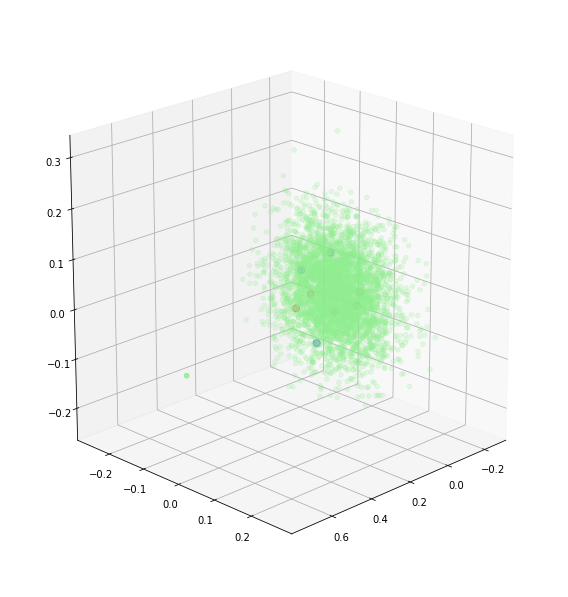

In [79]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure(1, figsize=(8, 8))
plt.clf()
ax = Axes3D(fig, elev=20, azim=45, rect=[0, 0, .95, 1])

ax.scatter(vecs_pca[:, 0], vecs_pca[:, 1], vecs_pca[:, 2], color='lightgreen', 
                           marker = 'o', s=20, cmap = cm.jet, alpha=0.2)
ax.scatter(vecs_pca[[56, 62, 63, 64, 68], 0], vecs_pca[[56, 62, 63, 64, 68], 1], vecs_pca[[56, 62, 63, 64, 68], 2], 
                        color='red', marker = 'o', s=50, cmap = cm.jet, alpha=0.5)
ax.scatter(vecs_pca[[116, 439, 837], 0], vecs_pca[[116, 439, 837], 1], vecs_pca[[116, 439, 837], 2], 
                       color='blue', marker = 'o', s=50, cmap = cm.jet, alpha=0.5)

#### I'd say 2 clusters this time...

In [80]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(vecs_pca)
labels = kmeans.labels_

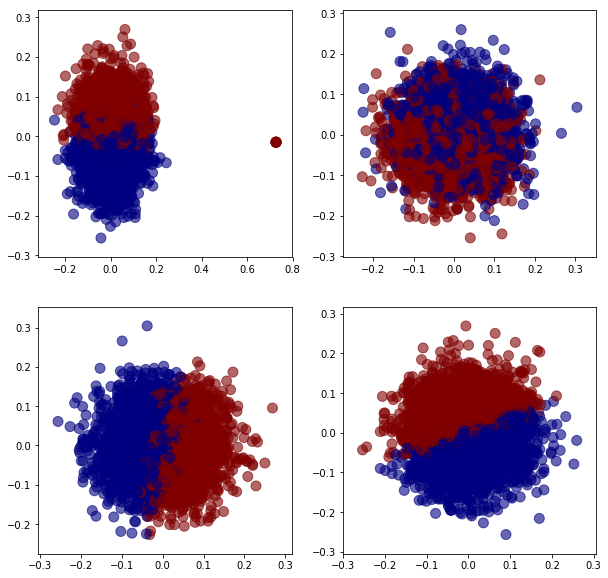

In [81]:
s=100
alpha=0.6
alpha2 = 0.2
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].scatter(vecs_pca[:, 0], vecs_pca[:, 1], c=labels, s=s, alpha=alpha, cmap = cm.jet)
axes[1, 0].scatter(vecs_pca[:, 1], vecs_pca[:, 2], c=labels, s=s, alpha=alpha, cmap = cm.jet)
axes[0, 1].scatter(vecs_pca[:, 2], vecs_pca[:, 3], c=labels, s=s, alpha=alpha, cmap = cm.jet)
axes[1, 1].scatter(vecs_pca[:, 3], vecs_pca[:, 1], c=labels, s=s, alpha=alpha, cmap = cm.jet)


In [82]:
pd.Series(labels).value_counts()

0    2224
1    2110
dtype: int64

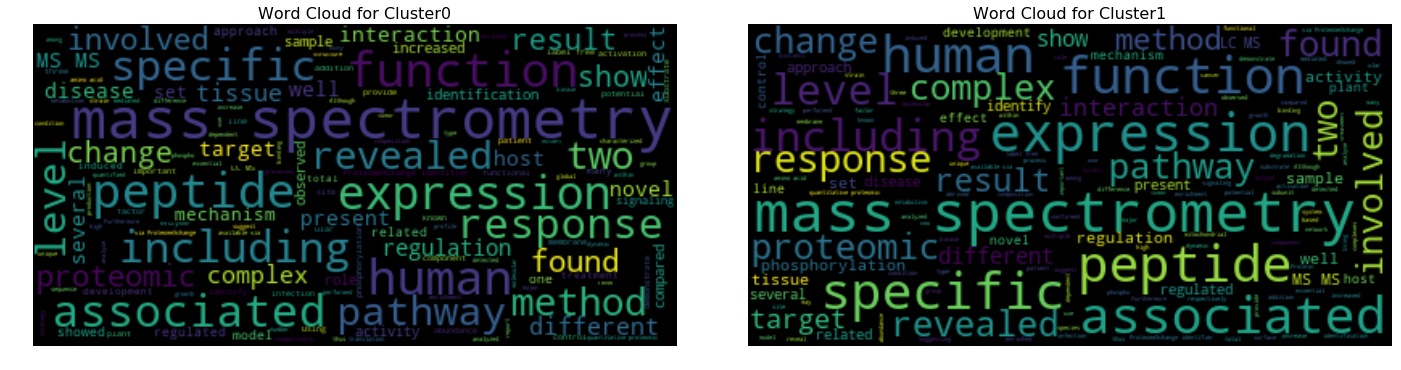

In [83]:
fig = plt.figure(figsize=(20, 5))
for i in range(2):
    clstr_inds = (np.argwhere(labels == i).flatten())
    clstr_text = ' '.join([abstracts[j] for j in clstr_inds])
    clstr_text = clstr_text.replace('protein', '')
    clstr_text = clstr_text.replace('analysis', '')
    clstr_text = clstr_text.replace('identified', '')
    clstr_text = clstr_text.replace('proteome', '')
    clstr_text = clstr_text.replace('data', '')
    clstr_text = clstr_text.replace('studies', '')
    clstr_text = clstr_text.replace('study', '')
    clstr_text = clstr_text.replace('cell', '')
    clstr_text = clstr_text.replace('using', '')
    clstr_text = clstr_text.replace('gene', '')
    clstr_text = clstr_text.replace('used', '')
    wc = WordCloud().generate(clstr_text)
    
    ax = fig.add_subplot(1, 2, i+1)
    ax.set_title('Word Cloud for Cluster%d' % i, fontsize=16)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')

fig.tight_layout()

This is not really helpful....

I tried to use a custom vector model trained on a collection of abstracts, but it appears that, even so, most abstracts are very similar to each other and cannot be separated well from each other. So unfortunately, subtlty in the text (e.g. differences in instruments, method) could not be picked up here, but I could 1) assemble different training sets, such as ones with 'description' and protocol fields from the scraped data, and 2) obtain abstracts from completely different fields, such as genomics, and see if texts here can be separated from the texts in other fields.